## Příklad: tažený-tlačený prut

<img src="Figures/example01geo.png" width = 400>
          

### Silné řešení (opakování)

Hledáme $u(x)$, které splňuje

$\displaystyle{EA\left(\frac{d^2 u(x)}{\ dx^2}\right) + 1,\ \ \ x\in(0,2),\ \ u(0)=0,\ N(2)=AE\frac{\ du(2)}{\ dx}=0}$

Integrací postupně dostaneme

$\displaystyle{EA\frac{\ du(x)}{\ dx} + 1x + C_1 = 0,\ \ \ \ EA u(x) + 1\frac{x^2}{2} + C_1 x + C_2= 0,}$


integrační konstanty $C_1$ a $C_2$ určíme z okrajových podmínek

$\displaystyle{ u(0)=0: C_2 = 0,\ \ \ \ N(2)=0: AE\frac{\ du(2)}{\ dx}=-C_1 - 2=0: C_1=-2}.$

Konečně tedy dostáváme

$\displaystyle{ u(x) = \frac{1}{EA} (2x-x^2/2),\ \ \ N(x) =  AE\frac{\ du(x)}{\ dx} = 2-x}.$

### Slabé řešení - lineární aproximace

Hledáme $u(x)$ (dostatečně integrovatelné), $u(0) = 0$ takové, aby:

$\displaystyle{
\int_0^2
EA\frac{\ d\delta u}{\ dx}(x) \frac{\ du}{\ dx}(x) \ dx
=\int_0^2
\delta u(x) 1
\ dx
}$

pro libolné $\delta u(x)$ (dostatečně integrovatelné), kde $\delta u(0) = 0$. 

Hledané řešení a váhovou funkci vyjádřeme jako:

$\displaystyle{u(x) = ax+b,\ \ \delta u(x)= cx + d}$

   * Z podmínky $u(0)=0$ plyne $b=0$,
   * Z podmínky $\delta u(0) = 0$ pak $d=0$,


Zvolenou aproximaci řešení a váhové funkce dosadíme do slabého řešení

$\displaystyle{\int_0^2ac\ dx-\int_0^2cx\ dx = 0},$

provedením integrace

$\displaystyle{2ac-2c=0}.$

Všimněte si, že každý člen obsahuje konstantu $c$ která je libovolná (vyjadřuje variabilitu volby váhové funkce)

$\displaystyle{c(2a-2)=0}.$

Protože $c\ne 0$, pak výraz v závorce musí být roven $0$

$\displaystyle{2a-2=0\ \Rightarrow\ a=1}.$

Konečně tedy dostáváme přibližné řešení

$\displaystyle{ u(x)=x,\ \ \ N(x)=EA\frac{\ du}{\ dx}= 1}.$

### Prvek s lineární aproximací

#### Lineární aproximace

Lineární aproximační funkce mají pro $x\in(0, l^e)$ tvar

$\displaystyle{
N_1 = 1-\frac{x}{l^e},\\
N_2 = \frac{x}{l^e}
}$

nebo obecně na intervalu $x\in(x_1, x_2)$
<img src="Figures/basis.png" width="270" align="right">

$\displaystyle{
N_1 = \frac{x_2 - x}{x_2-x_1},\\
N_2 = \frac{x - x_1}{x_2-x_1}.
}$

Libovolnou funkci $f(x)$ můžeme potom aproximovat jako lineární kombinaci bázových funkcí $N_i$ a uzlových hodnot $f_i$

$
f(x) = N_1 f_1 + N_2 f_2.
$

Tato aproximace popisuje danou funkci $f(x)$ přesně, pokud je funkce nejvýše prvního stupně (lineární). Analogicky, pomocí derivací bázových funkcí, můžeme aproximovat derivaci funkce. Derivace bázových funkcí pro lineární aproximaci mají tvar

$\displaystyle{
B_1=-\frac{1}{l^e},\\ 
B_2=\frac{1}{l^e}.
}$



#### Diskretizovaná úloha

Odvodili jsme si příspěvek jednolivých prvků do celkové soustavy rovnic

$
\boldsymbol{K^er} = \boldsymbol{f}_{\Gamma}^e +  \boldsymbol{f}_{\Gamma}^e ,
$

kde matice tuhosti $\boldsymbol{K^e}$  a vektory zatížení $\boldsymbol{f}_{\Gamma}^e, \boldsymbol{f}_{\Omega}^e $ mají tvar

$\displaystyle{
\boldsymbol{K^e} = \int_{\Omega} \boldsymbol{B}^e EA  \boldsymbol{B}^e \ dx, \\
\boldsymbol{f}_{\Gamma}^e =\left[\boldsymbol{N}^e \bar{N}\right]_{\Gamma_p},\\
\boldsymbol{f}_{\Omega}^e =\int_{\Omega} \boldsymbol{N}^e \bar{f_x} \ dx.
}$

Při použití lineární aproximace dostaneme

$\displaystyle{
\boldsymbol{K^e} = \int_{\Omega} \left\{ \begin{array}{c}
-\frac{1}{l^e}\\
\frac{1}{l^e}
\end{array}\right\}
 EA  \left\{ -\frac{1}{l^e}\quad \frac{1}{l^e} \right\}  \ dx  = \frac{EA}{l^e}\left[\begin{array}{cc}
1&-1\\
-1&1
\end{array}\right]
\\
\boldsymbol{f}_{\Gamma}^e =\left[\boldsymbol{N}^e \bar{N}\right]_{\Gamma_p},\\
\boldsymbol{f}_{\Omega}^e =\int_{\Omega} \boldsymbol{N}^e \bar{f_x} \ dx.
}$

### Řešení v Matlabu

Jeden prvek s lineární aproximací, porovnání s přesným řešením.

F =

   1   1

U =

   0   2



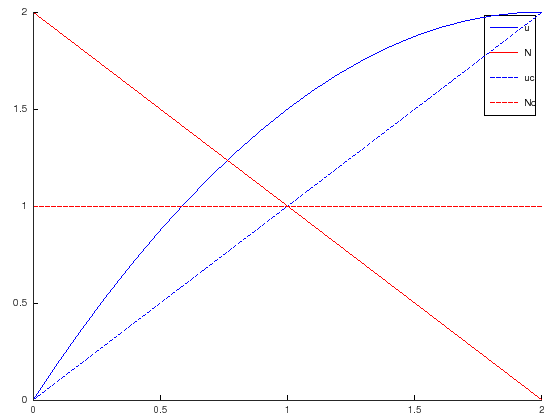

In [4]:
E = 1;
A = 1;
l1 = 2;

k1 = (E*A/l1)*[1 -1; -1 1];
loc1 = [0 1];
K = k1;
f1 = [l1^2/(2*l1) l1^2/(2*l1)];
F = f1

u = F(2)/K(2,2);
U = [0 u]
eps1 = (U(2)-U(1))/l1;
N1 = E*A*eps1;

hold on;
x = 0:0.1:2;
plot (x, -x.^2/2+2*x, "b;u;", x, -x+2, "r;N;")
plot ([0 l1], [U(1) U(2)], "b--;uc;")
plot ([0 l1], [N1 N1], "r--;Nc;")

#### Transformace do 2D
<img src="Figures/2dbar_transfrom.png">

Vztah mezi koncovými silami a posuny v lokální soustavě prutu jsme si odvodili minule.

$
\left\{\begin{array}{c}F_{1x}^{le}\\F_{2x}^{le}\end{array}\right\}=
\left[\begin{array}{cc}k^e& -k^e\\-k^e& k^e\end{array}\right]
\left\{\begin{array}{c}u_{1x}^{le}\\u_{2x}^{le}\end{array}\right\}
$


Nyní tento vztah rozšíříme do 2D. Nejprve rozšı́řı́me vztah pro koncové sı́ly a posuny prutu přidánı́m
lokálních koncových sil kolmých k ose prutu, které budou nulové, nebot jde o tažený-tlačený prut:

$F^l_{1y}= F^l_{2y}= 0:$

$
\left\{\begin{array}{c}F_{1x}^{le}\\F_{1y}^{le}\\F_{2x}^{le}\\F_{2y}^{le}\end{array}\right\}=
\left[\begin{array}{cccc}k^e& 0& -k^e& 0\\0&0&0&0\\-k^e& 0& k^e& 0\\0&0&0&0\end{array}\right]
\left\{\begin{array}{c}u_{1x}^{le}\\u_{1y}^{le}\\u_{2x}^{le}\\u_{2y}^{le}\end{array}\right\}
$


Pro transformaci složek vektoru mezi lokálnı́m a globálnı́m souřadným
systémem platı́:

$
\begin{array}{l}
u_{1x}^{le}&=&u_{1x}^{ge} \cos(\phi^e) + u_{1y}^{ge} \sin(\phi^e)\\
u_{1y}^{le}&=&-u_{1x}^{ge}\sin(\phi^e)+u_{1y}^{ge}\cos(\phi^e)
\end{array}
$



Maticově to pro vektory koncových sil či posunů můžeme zapsat jako

$
{r}^{le} = {T}^e{r}^{ge};\;{F}^{le} = {T}^e {F}^{ge}
$

$
{r}^{ge}=\{u_{1x}^{ge},u_{1y}^{ge},u_{2x}^{ge},u_{2y}^{ge}\}^T;\;\;
{T}^e=\left[\begin{array}{cccc}
\cos(\phi)& \sin(\phi)& 0& 0\\
-\sin(\phi)& \cos(\phi)& 0& 0\\
0&0&\cos(\phi)& \sin(\phi)\\
0&0&-\sin(\phi)& \cos(\phi)
\end{array}\right]
$

Pozn.: Transformačnı́ matice T je ortogonálnı́; tedy inverznı́ matice
je matice transponovaná

$
({T}^e)^T{T}^e = {T}^e({T}^e)^T = {I};\;\;\;({T}^e)^T = ({T}^e)^{-1}
$

$
\begin{array}{l}
{F}^{ge} &=& ({T}^e)^T{F}^{le}\\
&=&({T}^e)^T{K}^{le}{r}^{le}\\
&=&\underbrace{({T}^e)^T{K}^{le}{T}^e}_{{K}^{ge}}{r}^{ge}
\end{array}
$

Nynı́ můžeme již snadno odvodit vztah mezi globálnı́mi koncovými
silami a posuny

$
{K}^{ge}={{EA}\over{l}}\left[\begin{array}{cccc}
c^2&cs&-c^2&-cs\\
cs&s^2&-cs& -s^2\\
-c^2&-cs&c^2&cs\\
-cs&-s^2&cs&s^2
\end{array}\right];\;\;\begin{array}{c}c=\cos(\phi^e)\\s=\sin(\phi^e)\end{array}
$

### [Příklad (viz úvodní cvičení o Matlabu)](../01_Úvod%20do%20Matlabu/include/První%20MKP%20program%20v%20Matlabu.ipynb)


<div class="alert alert-block alert-info">

### Příklad k procvičení

Rozšiřte uvedený program pro řešení taženého-tlačeného prutu o nesilové účinky zatížení (předpokládejte např. oteplení konstrukce). 
 
##### Nápověda
<i>
Dle Hookeova zákona pro výpočet napětí platí

$\displaystyle{
\sigma = E(\varepsilon-\varepsilon_0),
}$

kde $\varepsilon_0$ je počáteční deformace. Od vlivu oteplení je $\varepsilon_0 = \alpha \Delta T$, kde $\Delta T$ je teplotní změna a $\alpha$ je koeficient teplotní roztažnosti (pro většinu stavebních materiálů $\alpha = 1.2\cdot  10^{-5}$). 
</i>

</div>
<font color="white">
c

<\font>

<pre>
(c) Bořek Patzák, Zdeněk Bittnar, Edita Dvořáková. Katedra mechaniky, Fakulta Stavební ČVUT v Praze, 
The content licensed under <a href="https://creativecommons.org/licenses/by-sa/4.0/legalcode">Attribution-ShareAlike 4.0</a> license.
</pre>